## Mount Drive and Clone Git

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/drive/My\ Drive/Object_Detection

In [139]:
%cd /content/drive/My\ Drive/Object_Detection

/content/drive/My Drive/Object_Detection


In [ ]:
!git clone https://github.com/21k-3103-Fahad/object_detection.git

Cloning into 'object_detection'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), 14.49 MiB | 7.82 MiB/s, done.


## Write Flask App

In [140]:
!pip install Flask

### app.py

In [303]:
%%writefile /content/drive/MyDrive/Object_Detection/object_detection/app.py
from flask import Flask, request, jsonify, render_template
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Initialize Flask app
app = Flask(__name__)

# Load the pre-trained model
custom_model = load_model("/content/drive/MyDrive/Object_Detection/object_detection/cifar10_model.h5")

# CIFAR-10 class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))  # Resize to 32x32
    img_array = image.img_to_array(img)  # Convert to array
    img_array = img_array.astype('float32') / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Route to handle file upload and prediction
@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        # Check if the post request has the file part
        if 'file' not in request.files:
            return jsonify({'error': 'No file part'})
        file = request.files['file']
        if file.filename == '':
            return jsonify({'error': 'No selected file'})
        if file:
            try:
                # Save the file to disk
                filepath = os.path.join('/content/', file.filename)
                file.save(filepath)

                # Preprocess the image
                img_array = preprocess_image(filepath)

                # Make prediction
                predictions = custom_model.predict(img_array)
                predicted_class_index = np.argmax(predictions)
                predicted_class = class_labels[predicted_class_index]
                predicted_confidence = (predictions[0][predicted_class_index]) * 100

                # Remove the file after processing
                os.remove(filepath)

                return jsonify({
                    'predicted_class': predicted_class,
                    'predicted_confidence': f'{predicted_confidence:.2f}'
                })
            except Exception as e:
                return jsonify({'error': str(e)})
    return '''
    <!doctype html>
    <title>Upload an Image</title>
    <h1>Upload an image for CIFAR-10 classification</h1>
    <form method=post enctype=multipart/form-data>
      <input type=file name=file>
      <input type=submit value=Upload>
    </form>
    '''

# Run the app
if __name__ == '__main__':
   app.run(debug=False, port=8501)  # Explicitly specify the port



Overwriting /content/drive/MyDrive/Object_Detection/object_detection/app.py


## Run & Deploy App

In [178]:
# Install ngrok:
!pip install pyngrok
from pyngrok import ngrok

In [179]:
!pip install flask-ngrok

In [226]:
# Authenticate ngrok:
# !ngrok authtoken YOUR_AUTHTOKEN_HERE
!ngrok config add-authtoken '2kt3XyY4IBykUPD5JUcoExZcbtG_59PUiF5Ay7Xkk1QUDiQMp'

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [227]:
ngrok.set_auth_token("2kt3XyY4IBykUPD5JUcoExZcbtG_59PUiF5Ay7Xkk1QUDiQMp")

In [182]:
# Set up ngrok and start the Flask
from pyngrok import ngrok

# Run the Flask app in collab
public_url = ngrok.connect(5000)
print(f'Public URL: {public_url}')

# Start Flask app
app.run()

Public URL: NgrokTunnel: "https://4c38-35-203-150-83.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [21/Aug/2024 01:55:06] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [21/Aug/2024 01:55:07] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


INFO:werkzeug:127.0.0.1 - - [21/Aug/2024 01:55:16] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [21/Aug/2024 01:55:17] "GET /static/frog_test.jpg HTTP/1.1" 404 -


In [304]:
ngrok.kill()
# !pkill ngrok

In [305]:
# Run the Flask App with ngrok:

from pyngrok import ngrok

# Close any existing ngrok tunnels
# ngrok.kill()
!nohup python /content/drive/MyDrive/Object_Detection/object_detection/app.py &

# Open a new ngrok tunnel to the Flask app running on port 8501
# public_url = ngrok.connect(8501)
public_url = ngrok.connect(8501, proto= 'http', bind_tls=True)
print('Flask app is live at:', public_url)

# Internal Server Error

nohup: appending output to 'nohup.out'
Flask app is live at: NgrokTunnel: "https://246e-35-203-150-83.ngrok-free.app" -> "http://localhost:8501"


We have temporarily deployed our app on `ngrok`.

Open a web browser and navigate to the public URL to access the Flask App.


## Deployed App

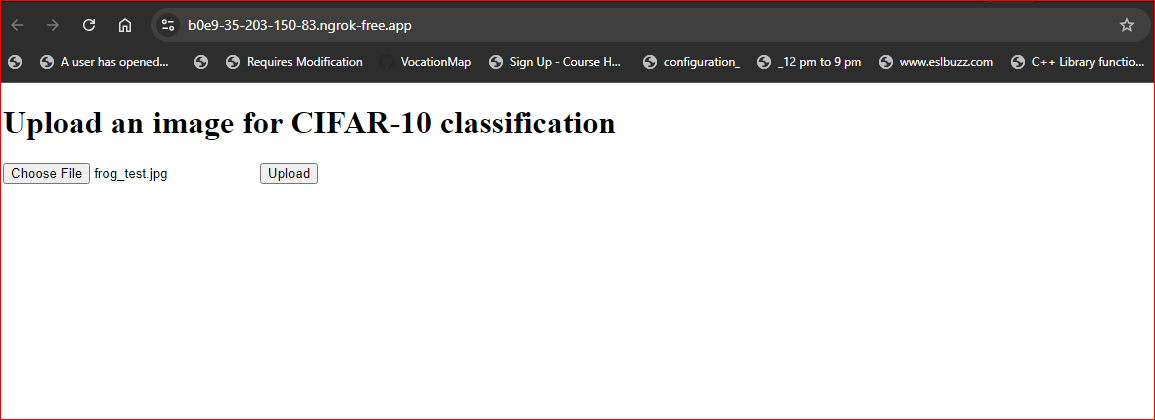

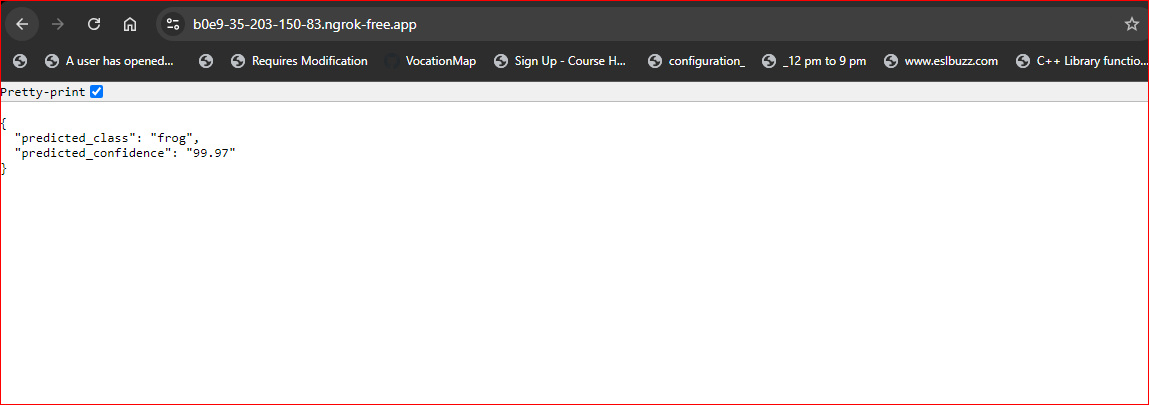



---



---



**UI & Deployment Done by Hassan, Moneka, Shaeel**